Here we look at some data from Wine Reviews

https://www.kaggle.com/zynicide/wine-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
wineReviews = pd.read_csv("http://knuth.luther.edu/~doroel01/winemag-data-130k-v2.csv")

In [3]:
wineReviews.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
wineReviews.shape

(129971, 14)

In [5]:
wineReviews['price'].head()

0     NaN
1    15.0
2    14.0
3    13.0
4    65.0
Name: price, dtype: float64

In [6]:
wineReviews['price']= wineReviews['price'].fillna(0)
wineReviews['price'].head()

0     0.0
1    15.0
2    14.0
3    13.0
4    65.0
Name: price, dtype: float64

In [7]:
criterial = wineReviews.price > 0
wineReviews2 = wineReviews[criterial]
criterial = wineReviews.price > 0
wineReviews2.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian


In [8]:
wineReviews2.shape

(120975, 14)

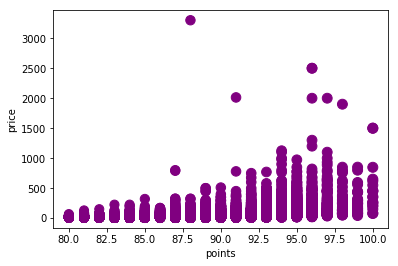

In [9]:
wineReviews2.plot.scatter(x="points", y="price", s=wineReviews2["points"], color="purple")
plt.show()

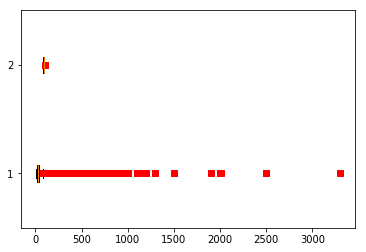

In [10]:
winedata = [wineReviews2["price"], wineReviews2["points"]]
plt.boxplot(winedata, False, "rs", False)
plt.show()

In [11]:
wineReviews2ByCountry = wineReviews2.groupby('country').mean()["price"]
wineReviews2ByCountry.head()

country
Argentina                 24.510117
Armenia                   14.500000
Australia                 35.437663
Austria                   30.762772
Bosnia and Herzegovina    12.500000
Name: price, dtype: float64

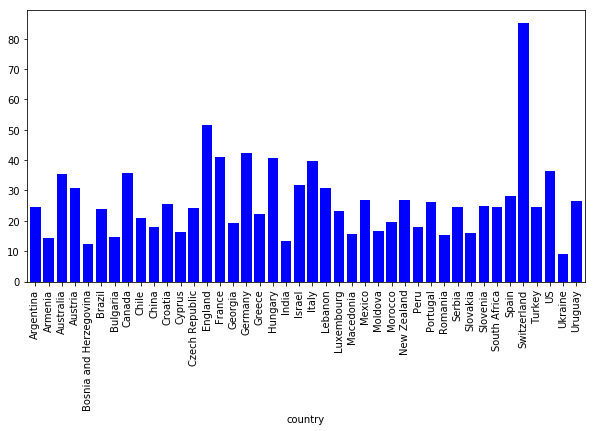

In [12]:
wineReviews2ByCountry.plot(kind="bar", width=0.8, figsize=(10,5), color = 'blue')
plt.show()

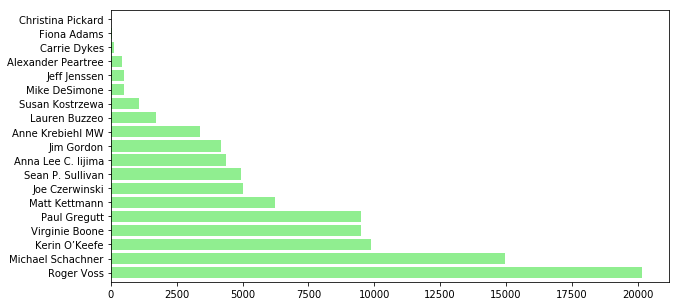

In [13]:
wineReviews2byTaster = wineReviews2["taster_name"].value_counts()
wineReviews2byTaster.plot(kind="barh", width=0.8, figsize=(10,5), color = 'lightgreen')
plt.show()

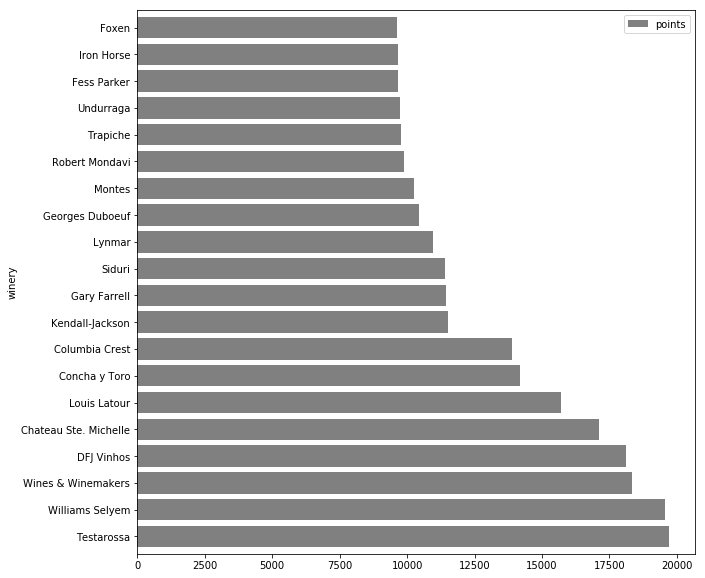

In [14]:
wineryPoints = wineReviews2[["winery", "points"]]
totalPointsByWinery = wineryPoints.groupby(["winery"]).sum().sort_values("points", ascending = False).head(20)
totalPointsByWinery.head(20)
totalPointsByWinery.plot(kind="barh", width= 0.8, figsize = (10,10), color= "grey")
plt.show()